# Evulation

In [15]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image


from tensorflow.keras.models import load_model
model = load_model('model.h5')



In [16]:
test_set =  "Dataset/test"
train_set = "Dataset/train"
val_set =   "Dataset/val"

class_names = os.listdir(train_set)

In [12]:

datagen = image.ImageDataGenerator(
 rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1


)

In [13]:
train_generator = datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'categorical')
test_generator = datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [7]:
model.evaluate(train_generator)

/home/kaan/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 102s 496ms/step - accuracy: 0.9828 - auc_2: 0.9987 - loss: 0.0513 - precision_2: 0.9831 - recall_2: 0.9825


[0.05935807526111603,
 0.979687511920929,
 0.9805825352668762,
 0.9784374833106995,
 0.9985993504524231]

In [8]:
model.evaluate(validation_generator)

/home/kaan/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 67s 535ms/step - accuracy: 0.9464 - auc_2: 0.9938 - loss: 0.1587 - precision_2: 0.9490 - recall_2: 0.9425


[0.17268089950084686,
 0.9415000081062317,
 0.944136917591095,
 0.9380000233650208,
 0.9932699799537659]

In [9]:
model.evaluate(test_generator)

50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 519ms/step - accuracy: 0.9655 - auc_2: 0.9941 - loss: 0.1343 - precision_2: 0.9660 - recall_2: 0.9537


[0.12253571301698685,
 0.9637500047683716,
 0.965865969657898,
 0.9549999833106995,
 0.9955139756202698]

50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 580ms/step


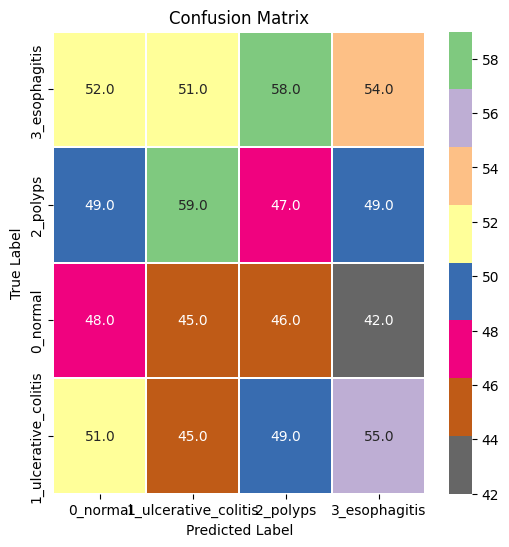

In [17]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred,axis=1)
confusion_matrix = confusion_matrix(y_pred,test_generator.classes)
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax, cmap=plt.cm.Accent_r)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_generator.class_indices)
ax.yaxis.set_ticklabels(class_names)
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[9.9997938e-01 1.1503134e-05 3.2739340e-06 5.8700793e-06]]
THE UPLOADED IMAGE SEEMS TO BE: Normal


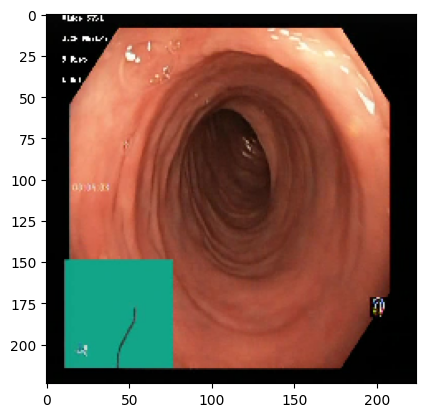

In [24]:
from keras.preprocessing import image
img = image.load_img('Dataset/test/0_normal/test_normal_ (20).jpg',target_size=(224,224))

imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)

a=np.argmax(ypred,-1)

if a==0:
    op="Normal"
elif a ==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)

print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))  